In [1]:
from main.genome.genome_net import GenotypeNet
from main.genome.base_genome import BaseGenome
from main.genome.genome import Genome
from main.config import Config

In [2]:
import torch
import torch.nn as nn
import psutil, os, copy

In [3]:
config = Config()

genome1 = Genome(config)
genome2 = Genome(config)

child = copy.deepcopy(genome1)
child.crossover(genome2)
net = child.build_net()

In [ ]:
BaseGenome.visualize_genome(child.genome)

In [4]:
print("Input size: ", config.input_size)
print("Output size: ", config.output_size)

input = torch.rand(1024, 10)
target = torch.rand(1024, 1)

print("Input: ", input)
print("Target: ", target)

def get_memory_usage_mb():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024**2

criterion = nn.MSELoss()
optimiser = torch.optim.SGD(net.parameters(), lr=0.01)
for i in range(10):
    optimiser.zero_grad()
    output = net(input)
    loss = criterion(output, target)
    loss.backward()
    optimiser.step()

    mem_used = get_memory_usage_mb()
    print(f"Batch {i}: RAM used = {mem_used:.2f} MB")

print(f"Child Stats: {child.num_nodes} nodes, {child.num_layers} layers, {len([c for c in child.genome.connections.values() if c.enabled])} enabled connections")

Input size:  10
Output size:  1
Input:  tensor([[0.3541, 0.6480, 0.9329,  ..., 0.8679, 0.8957, 0.2728],
        [0.5549, 0.8719, 0.9700,  ..., 0.2520, 0.2016, 0.7799],
        [0.1317, 0.7513, 0.6643,  ..., 0.0050, 0.7399, 0.1546],
        ...,
        [0.8263, 0.1015, 0.6972,  ..., 0.3229, 0.1196, 0.2704],
        [0.7394, 0.7373, 0.4939,  ..., 0.8800, 0.9107, 0.2001],
        [0.2131, 0.9572, 0.7060,  ..., 0.3480, 0.1296, 0.3969]])
Target:  tensor([[0.2833],
        [0.0033],
        [0.6164],
        ...,
        [0.9270],
        [0.1227],
        [0.8616]])
Batch 0: RAM used = 448.15 MB
Batch 1: RAM used = 435.01 MB
Batch 2: RAM used = 432.25 MB
Batch 3: RAM used = 485.97 MB
Batch 4: RAM used = 515.26 MB
Batch 5: RAM used = 463.19 MB
Batch 6: RAM used = 448.87 MB
Batch 7: RAM used = 486.73 MB
Batch 8: RAM used = 418.30 MB
Batch 9: RAM used = 491.66 MB
Child Stats: 461 nodes, 151 layers, 47463 enabled connections


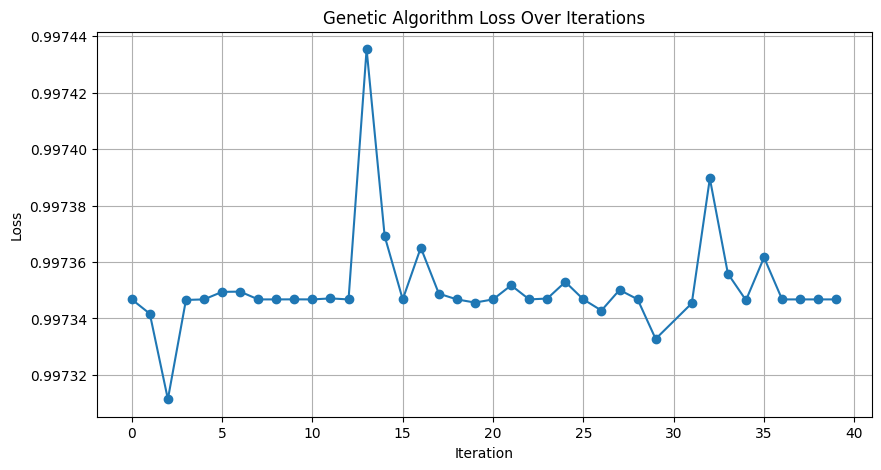

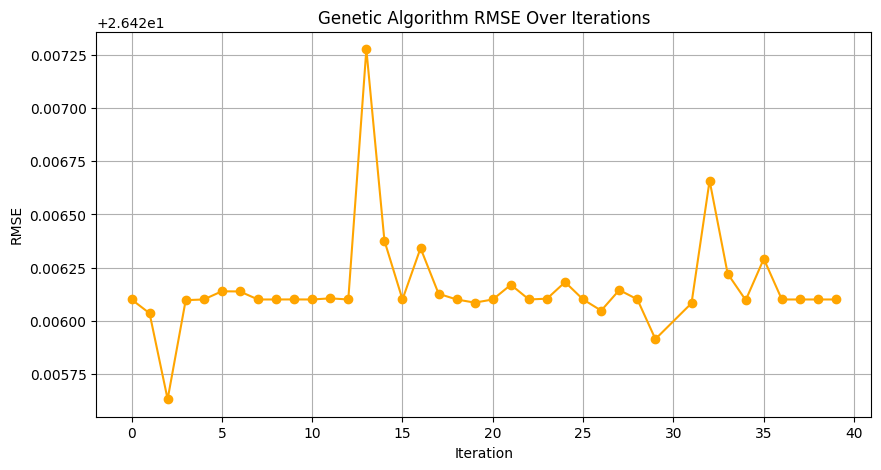

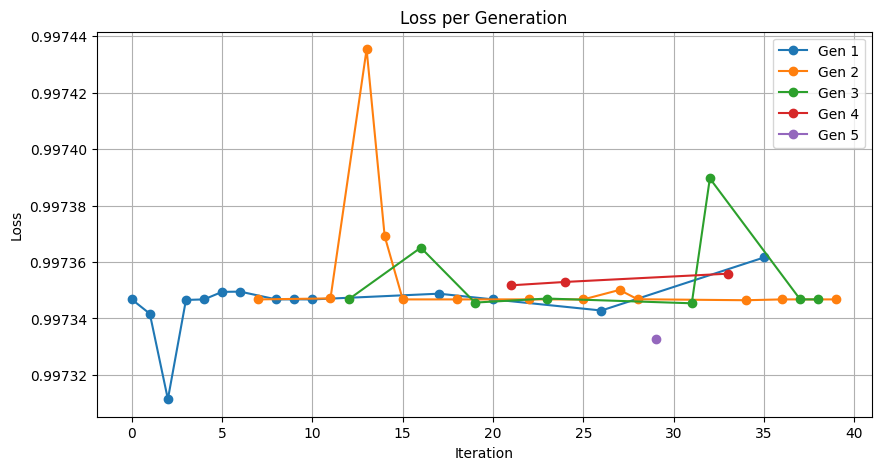

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("stats.csv")

# Sort by iteration just in case
df = df.sort_values("iteration")

# Plot loss over iteration
plt.figure(figsize=(10, 5))
plt.plot(df["iteration"], df["loss"], marker='o', linestyle='-', label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Genetic Algorithm Loss Over Iterations")
plt.grid(True)
plt.show()

# Plot RMSE over iteration
plt.figure(figsize=(10, 5))
plt.plot(df["iteration"], df["rmse"], marker='o', linestyle='-', color='orange', label="RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Genetic Algorithm RMSE Over Iterations")
plt.grid(True)
plt.show()

# Optional: Loss colored by generation
plt.figure(figsize=(10, 5))
for gen in df["generation"].unique():
    gen_df = df[df["generation"] == gen]
    plt.plot(gen_df["iteration"], gen_df["loss"], marker='o', linestyle='-', label=f"Gen {gen}")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss per Generation")
plt.legend()
plt.grid(True)
plt.show()
